# Introduction

Name    : Abi Rahman Sugiri

Batch   : RMT-021

Deployment Link : [HUGGING FACE - Term Deposit Prediction](https://huggingface.co/spaces/abisugiri/deposit_subscription_prediction)

# Background

Term deposit is one of the major source of income for banks. It is a mean of invesment held by financial institution. where the client's money is invested with an agreement for rate of interest over fixed amount of time, also known as term. The marketing strategies from the bank to sell and promote term deposits are vaaried from email marketing, advertisements, telephonic marketing, and digital marketing.

One of the most effective marketing to reach out to customers is the campaign through telephhonic marketing but one of the down side is that it requires huge invesment. Large call centers are contracted to execute these  marketing campaigns, thus it is critical to able to identify customers that are likely to have the potential to subscribe term deposits via call. In this project, the data science team aim to assist the marketing on predicting customer's potential to subscribe to term deposit through applying artificial neural network method.


# About the  Dataset


The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

Features in this dataset include:

| Column | Description |
| --- | --- |
| `age` | Age of the client |
| `job` | Client occupations |
| `marital` | Marital Status ("married","divorced","single"; note: "divorced" means divorced or widowed)|
| `education` | Customer's latest education |
| `default` | Has credit in default? (binary: "yes","no") |
| `balance` | Average yearly balance, in Euros |
| `housing` | Does the customer have housing loan? (binary: "yes","no") |
| `loan` | Does the customer have personal loan? (binary: "yes","no") |
| `contact` | Types of communcation means to customers (categorical: "unknown","telephone","cellular") |
| `day` | Last contact day of the month (numeric) |
| `month` | Last contact month of year (categorical: "jan", "feb", "mar", …,) |
| `duration` | Last contact duration, in seconds (numeric) |
| `campaign` | Number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| `pdays` | number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) |
| `previous` | Number of contacts performed for the client before this campaign |
| `poutcome` | Outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") |
| `y` | Has the client subscribed a term deposit? (binary: "yes","no") |


source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets

# Importing Libraries

In [9]:
#Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from imblearn.over_sampling import RandomOverSampler

import time
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [204]:
#Loading Data
data_train = pd.read_csv(r'C:\Users\abisu\ftds_final_projects\train.csv', sep = ';', engine= 'python')

data_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [205]:
#Loading Data
data_test = pd.read_csv(r'C:\Users\abisu\ftds_final_projects\test.csv', sep = ';', engine= 'python')

data_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Concating both train and test set as a one dataset

In [206]:
frames = [data_train, data_test]

data = pd.concat(frames)

to better read the dataset, the column `y` is changed to `subscription`

In [207]:
data.rename(columns={"y": "subscription"}, inplace=True)

In [208]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [209]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [210]:
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


# Exploratory Data Analysis

In [211]:
# Checking data types
data.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
subscription    object
dtype: object

In [212]:
#check dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           49732 non-null  int64 
 1   job           49732 non-null  object
 2   marital       49732 non-null  object
 3   education     49732 non-null  object
 4   default       49732 non-null  object
 5   balance       49732 non-null  int64 
 6   housing       49732 non-null  object
 7   loan          49732 non-null  object
 8   contact       49732 non-null  object
 9   day           49732 non-null  int64 
 10  month         49732 non-null  object
 11  duration      49732 non-null  int64 
 12  campaign      49732 non-null  int64 
 13  pdays         49732 non-null  int64 
 14  previous      49732 non-null  int64 
 15  poutcome      49732 non-null  object
 16  subscription  49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [213]:
#Checking for missing values

data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscription    0
dtype: int64

This dataset has zero missing value. 

In [214]:
# Checking basic statistic
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [215]:
# Duplication Check 
data.duplicated().sum()

4521

There are 4521 data entries that are duplicated. The next step is to plot the duplicated data.

In [216]:
# Show duplicated row
data[data.duplicated(keep=False)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
14,57,services,married,secondary,no,162,yes,no,unknown,5,may,174,1,-1,0,unknown,no
30,57,technician,married,secondary,no,839,no,yes,unknown,5,may,225,1,-1,0,unknown,no
33,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [217]:
# Remove duplicate data
data.drop_duplicates(keep='first', inplace=True)

In [218]:
# Duplication Check 
data.duplicated().sum()

0

In [219]:
# checking data shape
data.shape

(45211, 17)

In [220]:
# Cardinality Check
print('Shape of Dataset : ', data.shape)
print('')

for col in data.columns.tolist():
  print('Column : ', col)
  print('Length Unique Value : ', data[col].unique())
  print('')

Shape of Dataset :  (45211, 17)

Column :  age
Length Unique Value :  [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

Column :  job
Length Unique Value :  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column :  marital
Length Unique Value :  ['married' 'single' 'divorced']

Column :  education
Length Unique Value :  ['tertiary' 'secondary' 'unknown' 'primary']

Column :  default
Length Unique Value :  ['no' 'yes']

Column :  balance
Length Unique Value :  [ 2143    29     2 ...  8205 14204 16353]

Column :  housing
Length Unique Value :  ['yes' 'no']

Column :  loan
Length Unique Value :  ['no' 'yes']

Column :  contact
Length Unique Value :  ['unknown' 'cellular' 'telephone']

Column :  day
Lengt

In [221]:
# Cardinality Check

print('Shape of Dataset : ', data.shape)
print('')

for col in data.columns.tolist():
  print('Column : ', col)
  print('Length Unique Value : ', data[col].nunique())
  print('')

Shape of Dataset :  (45211, 17)

Column :  age
Length Unique Value :  77

Column :  job
Length Unique Value :  12

Column :  marital
Length Unique Value :  3

Column :  education
Length Unique Value :  4

Column :  default
Length Unique Value :  2

Column :  balance
Length Unique Value :  7168

Column :  housing
Length Unique Value :  2

Column :  loan
Length Unique Value :  2

Column :  contact
Length Unique Value :  3

Column :  day
Length Unique Value :  31

Column :  month
Length Unique Value :  12

Column :  duration
Length Unique Value :  1573

Column :  campaign
Length Unique Value :  48

Column :  pdays
Length Unique Value :  559

Column :  previous
Length Unique Value :  41

Column :  poutcome
Length Unique Value :  4

Column :  subscription
Length Unique Value :  2



In [222]:
#Counting subscription
subscription_counts = data['subscription'].value_counts()
subscription_counts

no     39922
yes     5289
Name: subscription, dtype: int64

In [223]:
subscription_counts_df = pd.DataFrame(subscription_counts)
subscription_counts_df

,subscription
no,39922
yes,5289


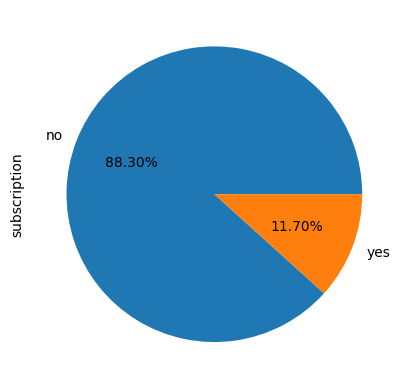

In [224]:
#plot pie chart
subscription_counts.plot.pie(autopct='%.2f%%')
plt.show()

From the pie chart above the customers that are not subscribed to term deposit is the majority with over 88 % and 11.70% of customers are subscribed.

In [225]:
marital_counts = data['marital'].value_counts()
marital_counts_df = pd.DataFrame(marital_counts)
marital_counts_df

,marital
married,27214
single,12790
divorced,5207


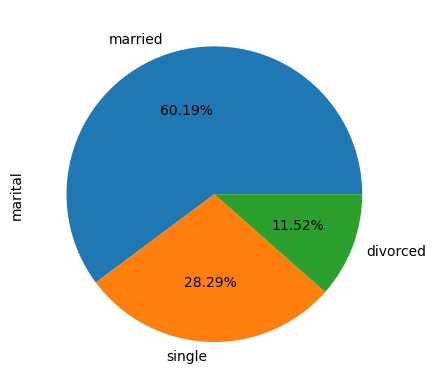

In [226]:
#plot pie chart
marital_counts.plot.pie(autopct='%.2f%%')
plt.show()

The majority marital status of the customers are married with over 60% and the smallest group is divorced with around 11%

In [227]:
education_counts = data['education'].value_counts()
education_counts_df = pd.DataFrame(education_counts)
education_counts_df

,education
secondary,23202
tertiary,13301
primary,6851
unknown,1857


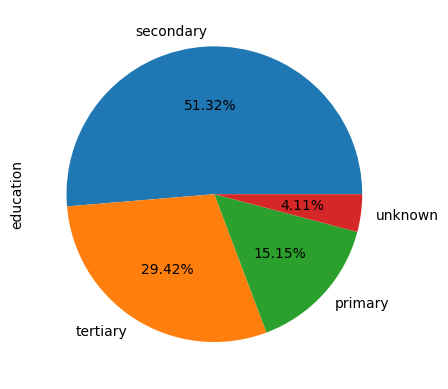

In [228]:
#plot pie chart
education_counts.plot.pie(autopct='%.2f%%')
plt.show()

Based on the chart above, we can see that the secondary level of education has the largest proportion in this dataset, followed by tertiary, primary and the last is unknown.

In [229]:
# credit in default
default_counts = data['default'].value_counts()
default_counts_df = pd.DataFrame(default_counts)
default_counts_df

,default
no,44396
yes,815


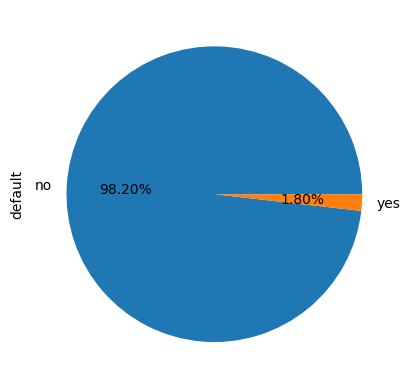

In [230]:
#plot pie chart
default_counts.plot.pie(autopct='%.2f%%')
plt.show()

The majority of the customer don't have credit default with 98%

In [231]:
# Housing Credit
housing_counts = data['housing'].value_counts()
housing_counts_df = pd.DataFrame(housing_counts)
housing_counts_df

,housing
yes,25130
no,20081


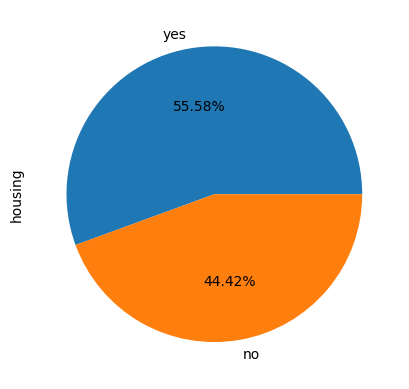

In [232]:
#plot pie chart
housing_counts.plot.pie(autopct='%.2f%%')
plt.show()

From the pie chart above, over 55% customers have housing loan and 44.42% don't have housing loan

In [233]:
# loan
loan_counts = data['loan'].value_counts()
loan_counts_df = pd.DataFrame(loan_counts)
loan_counts_df

,loan
no,37967
yes,7244


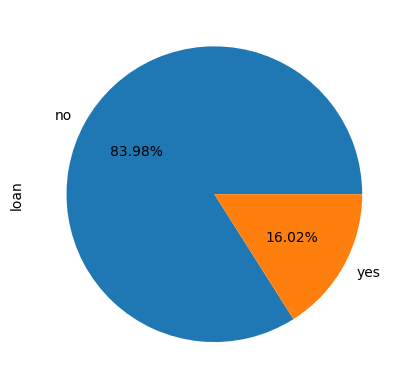

In [234]:
#plot pie chart
loan_counts.plot.pie(autopct='%.2f%%')
plt.show()

Most of the customers (83.98%) do not have personal loan

In [235]:
# Campaign outcome
poutcome_counts = data['poutcome'].value_counts()
poutcome_counts_df = pd.DataFrame(poutcome_counts)
poutcome_counts_df

,poutcome
unknown,36959
failure,4901
other,1840
success,1511


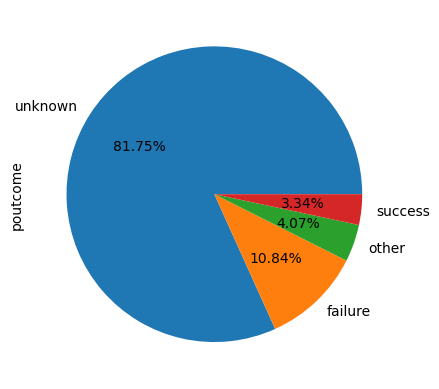

In [236]:
#plot pie chart
poutcome_counts.plot.pie(autopct='%.2f%%')
plt.show()

Most of the outcome from the previous outcome from the customers are unknown with 81.75%, folowed by failure with 10.84%, other 4.07%, and success 3.34%

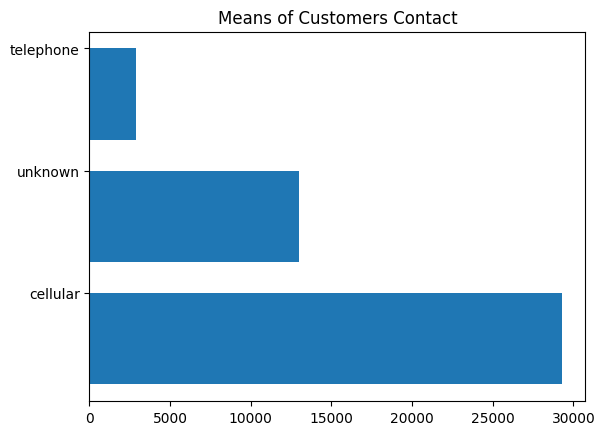

In [237]:
a = data.contact.value_counts()

x = list(a.index)
y = list(a)

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Means of Customers Contact')
plt.show()

Nearly 30000 customers are contacted through cellular, over 12000 are unknown and under 4000 customers are contacted through telephone

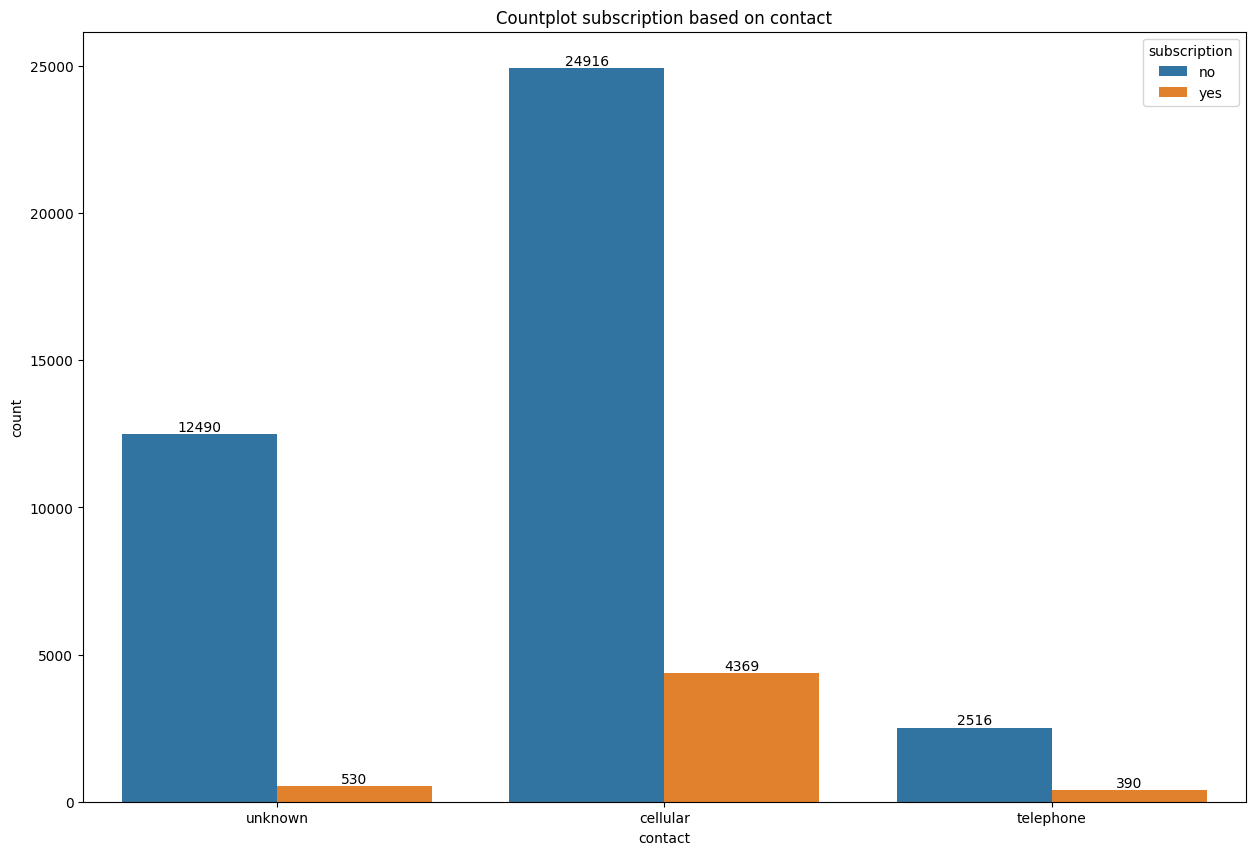

In [278]:
# Count Plot `subscription` based on `contact`
plt.figure(figsize=(15, 10))
pass_churn = sns.countplot(data=data, x="contact", hue="subscription")

for container in pass_churn.containers:
    pass_churn.bar_label(container)

plt.title('Countplot subscription based on contact')
plt.show()

The most successful means of contact is through cellular with 4369 customers are subscibed to term deposit

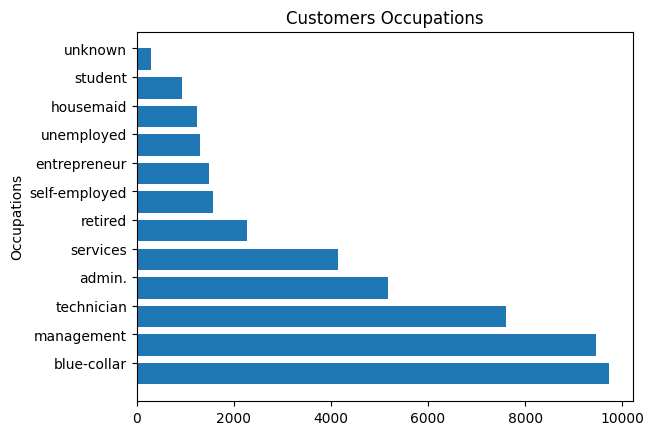

In [238]:
b = data.job.value_counts()

x = list(b.index)
y = list(b)

fig, bx = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
bx.barh(ind, y, width)
bx.set_yticks(ind+width/2)
bx.set_yticklabels(x, minor=False)
plt.title('Customers Occupations')
plt.ylabel('Occupations')
plt.show()

Majority of the customers' occupation is blue-collar with over 9000, followed by management and third place goes to technician. Unknown is the least with under 1000 customers.

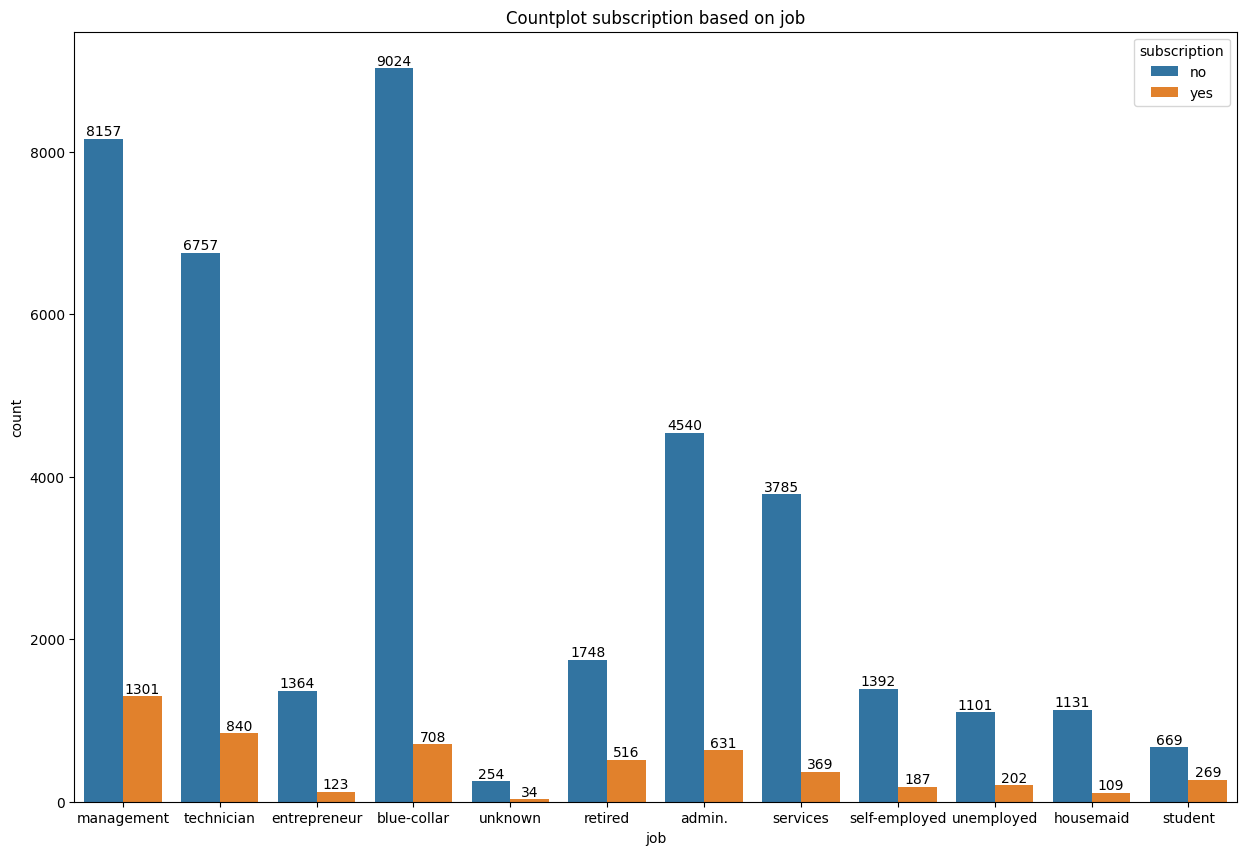

In [279]:
# Count Plot `subscription` based on `job`
plt.figure(figsize=(15, 10))
pass_churn = sns.countplot(data=data, x="job", hue="subscription")

for container in pass_churn.containers:
    pass_churn.bar_label(container)

plt.title('Countplot subscription based on job')
plt.show()

The customers in the management field as occupation are the most subscribed to term deposit followed by technician with 840, blue collar with 708, in administration field with 631, and retired with 516. Customers within this field can used for telephone marketing. Surprisingly, entrepreneur is quite low with only 123 customers.

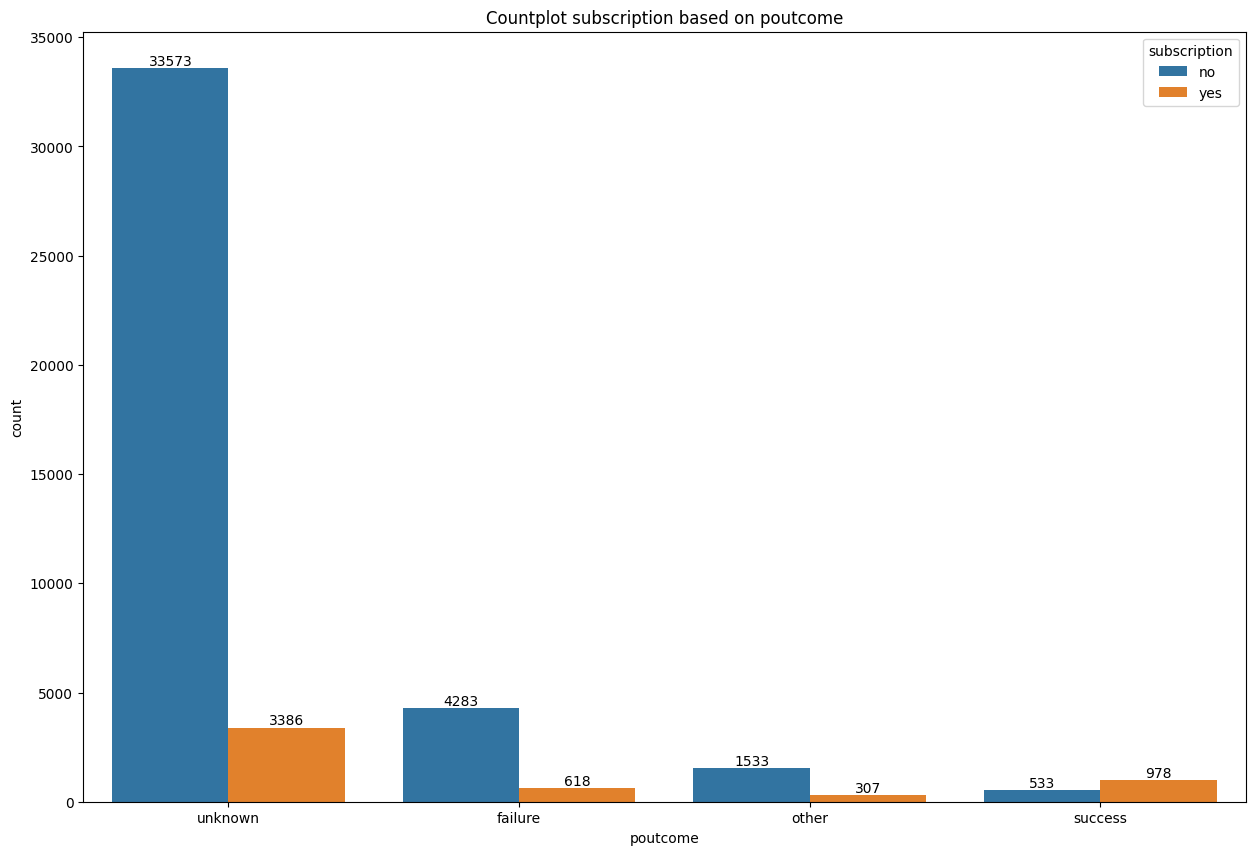

In [280]:
# Count Plot `subscription` based on `poutcome`
plt.figure(figsize=(15, 10))
pass_churn = sns.countplot(data=data, x="poutcome", hue="subscription")

for container in pass_churn.containers:
    pass_churn.bar_label(container)

plt.title('Countplot subscription based on poutcome')
plt.show()

Surprisingly `unknown` has the first place of gaining subscription with 3386 customers and second goes to `success` (978)

Bellow are the histograms of the numerical columns

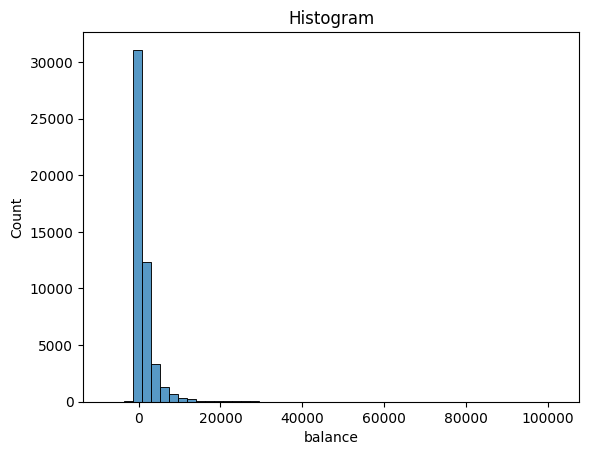

In [44]:
sns.histplot(data['balance'], bins=50)
plt.title('Histogram')
plt.show()

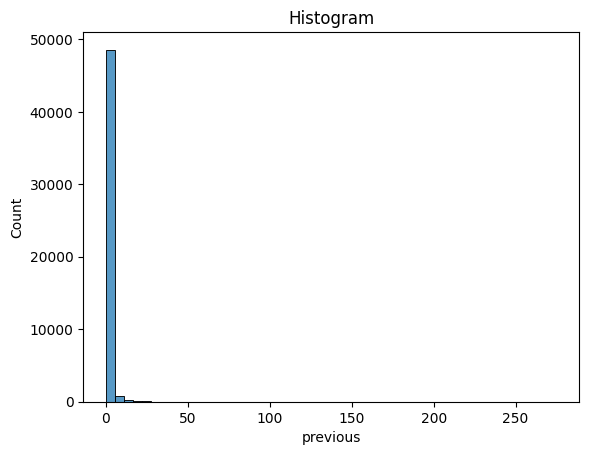

In [45]:
sns.histplot(data['previous'], bins=50)
plt.title('Histogram')
plt.show()

<Axes: >

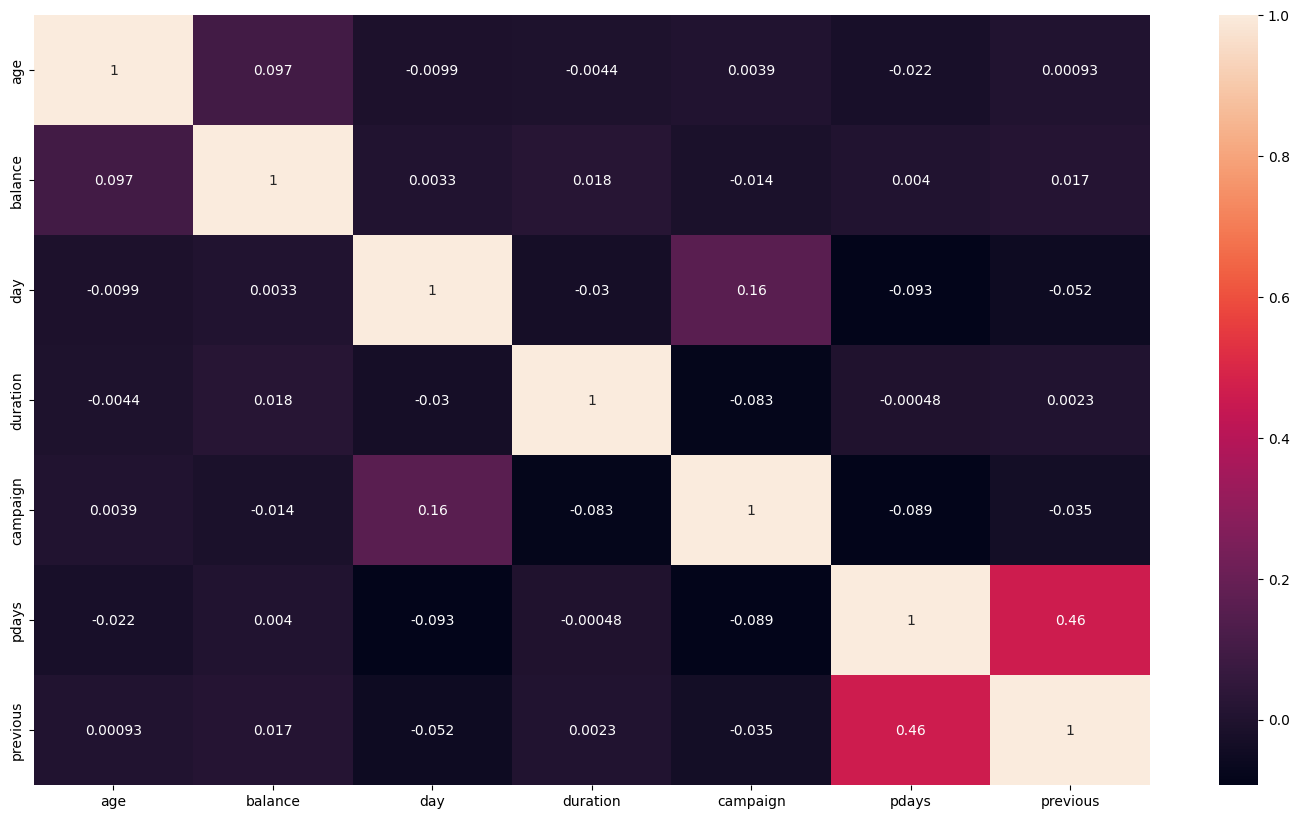

In [46]:
# heatmap dari correlation
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(),annot=True)

# Data Preprocessing

In this section, the data will be preprocessed such as oversampling, selecting features, splitting the dataset, scaling and encoding.

In [47]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [48]:
data.shape

(49732, 17)

## Feature Selection

The data science team consider feature `day` and `month` are irrelevant in terms of predicting the outcome, thus they will be dropped

In [52]:
# Dropping irrelevant columns
data.drop(['day', 'month'], axis=1, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


## Splitting to X and y dataset

In [53]:
# Splitting between X and y
X = data.drop(['subscription'], axis=1)
y = data['subscription']

X.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown


In [54]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: subscription, Length: 45211, dtype: object

## Oversampling

Oversampling is needed because the imbalance of data from `y` or `subscription`

In [55]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [56]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

## Splitting dataset into train and test dataset

In [57]:
#Splitting between train set and test set

from sklearn.model_selection import train_test_split

# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=50)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=50)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)
X_train

Train Size :  (38324, 14)
Val Size :  (9582, 14)
Test Size :  (11977, 14)


,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
33922,48,blue-collar,married,secondary,no,292,no,no,cellular,271,1,79,1,success
53884,50,blue-collar,married,primary,no,82,no,no,telephone,456,1,-1,0,unknown
44282,33,technician,divorced,secondary,no,948,no,no,unknown,7,1,-1,0,unknown
2458,50,blue-collar,married,secondary,no,160,yes,no,unknown,334,1,-1,0,unknown
41543,72,retired,married,secondary,no,17739,no,no,cellular,135,4,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26161,41,blue-collar,divorced,secondary,no,927,yes,no,cellular,343,2,-1,0,unknown
31250,33,management,married,tertiary,no,250,no,no,cellular,377,6,-1,0,unknown
46402,49,services,married,primary,no,1830,yes,no,cellular,261,1,179,1,success
57973,44,admin.,divorced,primary,no,429,yes,no,telephone,80,1,-1,0,unknown


## Handling Outlier

In [58]:
# Make function to show histogram & boxplot

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],kde=True, bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

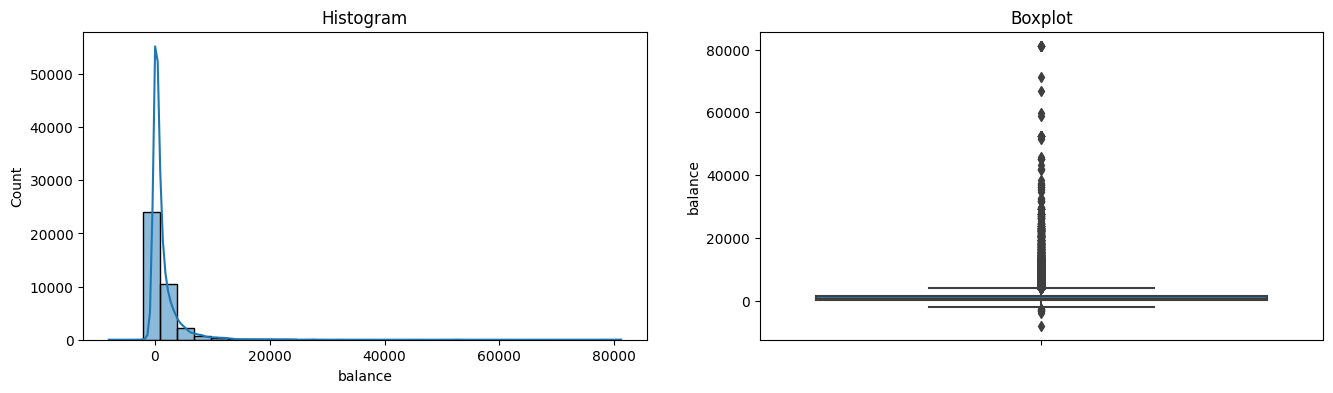


Skewness Value :  8.293794326389115


In [59]:
# Set value histogram & boxplot and show skewness from feature `balance`

diagnostic_plots(X_train, 'balance')
print('\nSkewness Value : ', X_train['balance'].skew())

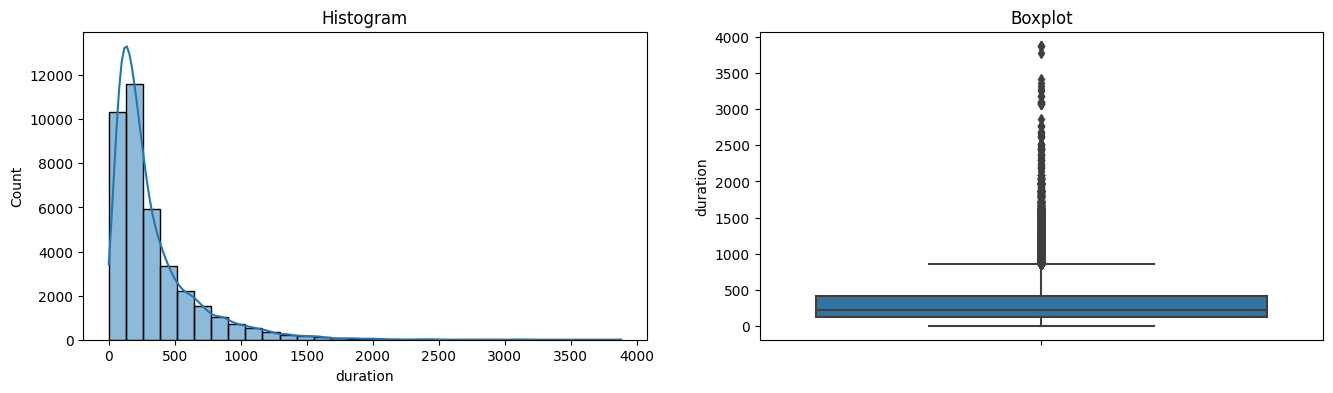


Skewness Value :  2.5037503629272835


In [60]:
# Set value histogram & boxplot and show skewness from feature `duration`

diagnostic_plots(X_train, 'duration')
print('\nSkewness Value : ', X_train['duration'].skew())

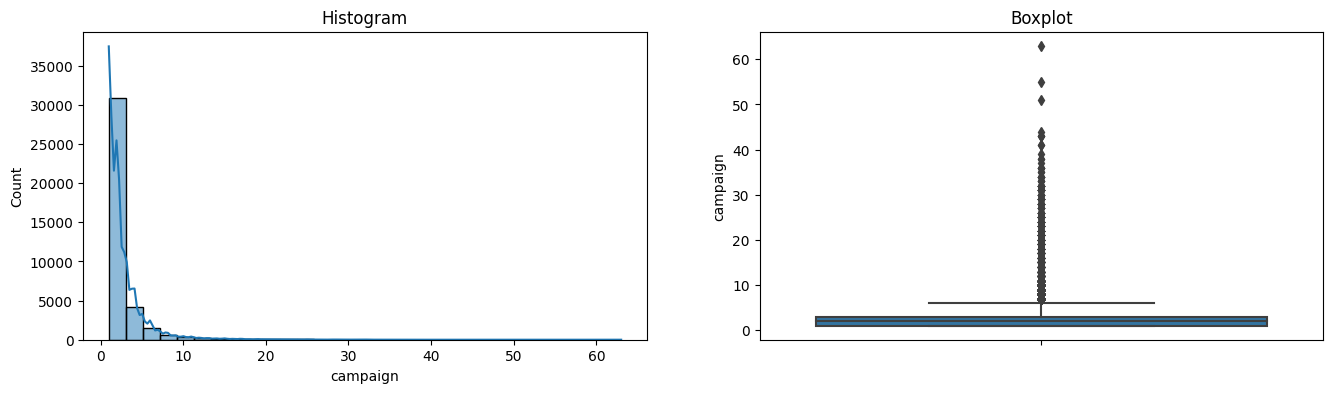


Skewness Value :  5.1507758999970354


In [61]:
# Set value histogram & boxplot and show skewness from feature `campaign`

diagnostic_plots(X_train, 'campaign')
print('\nSkewness Value : ', X_train['campaign'].skew())

Based on the histogram graphs that are right-tailed skewed

The data science team has decided to not to handle outliers so that keeping the data not heavily modified for this case

## Splitting to Numerical and Categorical Columns

This step is needed for encoding and scaling

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38324 entries, 33922 to 11204
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        38324 non-null  int64 
 1   job        38324 non-null  object
 2   marital    38324 non-null  object
 3   education  38324 non-null  object
 4   default    38324 non-null  object
 5   balance    38324 non-null  int64 
 6   housing    38324 non-null  object
 7   loan       38324 non-null  object
 8   contact    38324 non-null  object
 9   duration   38324 non-null  int64 
 10  campaign   38324 non-null  int64 
 11  pdays      38324 non-null  int64 
 12  previous   38324 non-null  int64 
 13  poutcome   38324 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.4+ MB


In [63]:
X_train.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
33922,48,blue-collar,married,secondary,no,292,no,no,cellular,271,1,79,1,success
53884,50,blue-collar,married,primary,no,82,no,no,telephone,456,1,-1,0,unknown
44282,33,technician,divorced,secondary,no,948,no,no,unknown,7,1,-1,0,unknown


In [64]:
# Get Numeric Columns and Categorical Columns
num_columns     = X[['age','balance', 'duration', 'campaign']].columns.tolist()
cat_columns_1   = X[['job', 'marital', 'education', 'contact', 'poutcome']].columns.tolist()
cat_columns_2   = X[['default', 'housing', 'loan']].columns.tolist()

print('Num Columns   : ', num_columns)
print('Cat Columns 1 : ', cat_columns_1)
print('Cat Columns 2 : ', cat_columns_2)

Num Columns   :  ['age', 'balance', 'duration', 'campaign']
Cat Columns 1 :  ['job', 'marital', 'education', 'contact', 'poutcome']
Cat Columns 2 :  ['default', 'housing', 'loan']


There are 2 groups categorical columns because of the difference of encoding the features. 

In [65]:
# Split train set and test set based on column types

X_train_num   = X_train[num_columns]
X_train_cat_1 = X_train[cat_columns_1]
X_train_cat_2 = X_train[cat_columns_2]


X_val_num   = X_val[num_columns]
X_val_cat_1 = X_val[cat_columns_1]
X_val_cat_2 = X_val[cat_columns_2]


X_test_num   = X_test[num_columns]
X_test_cat_1 = X_test[cat_columns_1]
X_test_cat_2 = X_test[cat_columns_2]


## Feature Scaling

In [66]:
X_train_num

,age,balance,duration,campaign
33922,48,292,271,1
53884,50,82,456,1
44282,33,948,7,1
2458,50,160,334,1
41543,72,17739,135,4
...,...,...,...,...
26161,41,927,343,2
31250,33,250,377,6
46402,49,1830,261,1
57973,44,429,80,1


In [67]:
# Show basic statistic

X_train_num.describe()

,age,balance,duration,campaign
count,38324.000000,38324.000000,38324.000000,38324.000000
mean,41.233666,1470.912535,327.849911,2.612175
std,11.481756,3148.546874,322.084009,2.900667
min,18.000000,-8019.000000,0.000000,1.000000
25%,32.000000,100.000000,123.000000,1.000000
50%,39.000000,512.000000,221.000000,2.000000
75%,49.000000,1611.000000,415.000000,3.000000
max,95.000000,81204.000000,3881.000000,63.000000


The distribution of data for the numerical columns are not normal, thus the data science decided to implemented MinMaxScaler

In [68]:
# Feature Scaling using MinmaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)
X_train_scaled  = scaler.transform(X_train_num)
X_val_scaled    = scaler.transform(X_val_num)
X_test_scaled   = scaler.transform(X_test_num)

## Feature Encoding

In [69]:
# Show categorical feature
X_train_cat_1

,job,marital,education,contact,poutcome
33922,blue-collar,married,secondary,cellular,success
53884,blue-collar,married,primary,telephone,unknown
44282,technician,divorced,secondary,unknown,unknown
2458,blue-collar,married,secondary,unknown,unknown
41543,retired,married,secondary,cellular,unknown
...,...,...,...,...,...
26161,blue-collar,divorced,secondary,cellular,unknown
31250,management,married,tertiary,cellular,unknown
46402,services,married,primary,cellular,success
57973,admin.,divorced,primary,telephone,unknown


In [70]:
# Show categorical feature
X_train_cat_2

,default,housing,loan
33922,no,no,no
53884,no,no,no
44282,no,no,no
2458,no,yes,no
41543,no,no,no
...,...,...,...
26161,no,yes,no
31250,no,no,no
46402,no,yes,no
57973,no,yes,no


In [71]:
print('Cat Columns 1 : ', cat_columns_1)
print('Cat Columns 2 : ', cat_columns_2)

Cat Columns 1 :  ['job', 'marital', 'education', 'contact', 'poutcome']
Cat Columns 2 :  ['default', 'housing', 'loan']


In [72]:
# Feature Encoding using OneHotEncoder

ohe_1 = OneHotEncoder(sparse_output=False)

X_train_enc_1   = ohe_1.fit_transform(X_train_cat_1[['job', 'marital', 'education', 'contact', 'poutcome']])
feature_names_1 = ohe_1.get_feature_names_out(input_features=['job', 'marital', 'education', 'contact', 'poutcome'])

X_train_enc_1  = pd.DataFrame(X_train_enc_1, columns=feature_names_1)

X_val_enc_1   = ohe_1.fit_transform(X_val_cat_1[['job', 'marital', 'education', 'contact', 'poutcome']])
X_test_enc_1   = ohe_1.fit_transform(X_test_cat_1[['job', 'marital', 'education', 'contact', 'poutcome']])

In [73]:
# Feature Encoding using LabelEncoder

label_enc = LabelEncoder()


X_train_cat_2['default'] = label_enc.fit_transform(X_train_cat_2['default'])
X_train_cat_2['housing'] = label_enc.fit_transform(X_train_cat_2['housing'])
X_train_cat_2['loan'] = label_enc.fit_transform(X_train_cat_2['loan'])

X_val_cat_2['default'] = label_enc.fit_transform(X_val_cat_2['default'])
X_val_cat_2['housing'] = label_enc.fit_transform(X_val_cat_2['housing'])
X_val_cat_2['loan'] = label_enc.fit_transform(X_val_cat_2['loan'])

X_test_cat_2['default'] = label_enc.fit_transform(X_test_cat_2['default'])
X_test_cat_2['housing'] = label_enc.fit_transform(X_test_cat_2['housing'])
X_test_cat_2['loan'] = label_enc.fit_transform(X_test_cat_2['loan'])

X_train_enc_2 = X_train_cat_2
X_val_enc_2 = X_val_cat_2
X_test_enc_2 = X_test_cat_2


In [74]:
X_train_enc_2

,default,housing,loan
33922,0,0,0
53884,0,0,0
44282,0,0,0
2458,0,1,0
41543,0,0,0
...,...,...,...
26161,0,1,0
31250,0,0,0
46402,0,1,0
57973,0,1,0


In [75]:
# Encoding output y

encoder = LabelEncoder()
encoder.fit(y_train)

y_train_enc = encoder.transform(y_train)
y_val_enc = encoder.transform(y_val)
y_test_enc = encoder.transform(y_test)
y_train_enc

array([1, 1, 0, ..., 1, 1, 0])

In [76]:
labels = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
print(labels)

{0: 'no', 1: 'yes'}


## Concating

In [77]:
# Concate columns

X_train_final = np.concatenate([X_train_scaled, X_train_enc_1, X_train_enc_2], axis = 1)
X_val_final   = np.concatenate([X_val_scaled, X_val_enc_1, X_val_enc_2], axis = 1)
X_test_final  = np.concatenate([X_test_scaled, X_test_enc_1, X_test_enc_2], axis = 1)
X_train_final

array([[0.38961039, 0.09314863, 0.06982736, ..., 0.        , 0.        ,
        0.        ],
       [0.41558442, 0.09079497, 0.11749549, ..., 0.        , 0.        ,
        0.        ],
       [0.19480519, 0.10050099, 0.00180366, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.4025974 , 0.11038634, 0.06725071, ..., 0.        , 1.        ,
        0.        ],
       [0.33766234, 0.09468411, 0.02061324, ..., 0.        , 1.        ,
        0.        ],
       [0.54545455, 0.08990955, 0.05849008, ..., 0.        , 0.        ,
        0.        ]])

In [78]:
# Create dataframe
X_train_final_df = pd.DataFrame(X_train_final, columns = [num_columns + list(feature_names_1) + cat_columns_2])
X_val_final_df = pd.DataFrame(X_val_final, columns = [num_columns + list(feature_names_1) + cat_columns_2])
X_test_final_df = pd.DataFrame(X_test_final, columns = [num_columns + list(feature_names_1) + cat_columns_2])
X_train_final_df

,age,balance,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default,housing,loan
0,0.389610,0.093149,0.069827,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.415584,0.090795,0.117495,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.194805,0.100501,0.001804,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.415584,0.091669,0.086060,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.701299,0.288692,0.034785,0.048387,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38319,0.298701,0.100266,0.088379,0.016129,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
38320,0.194805,0.092678,0.097140,0.080645,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38321,0.402597,0.110386,0.067251,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
38322,0.337662,0.094684,0.020613,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [79]:
X_train_final_df.shape

(38324, 33)

## Pipeline

In [80]:
# Training
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_final,y_train_enc)).batch(32).shuffle(100).repeat(2).prefetch(tf.data.AUTOTUNE)

# Validation
val_pipe   = tf.data.Dataset.from_tensor_slices((X_val_final,y_val_enc)).batch(32)

# Sequential API

In this project, data science team will model artificial neural network by implementing  **Sequential API** definition method 

## Model Definition

In [240]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [241]:
model_sequential = Sequential()
model_sequential.add(Dense(64,
                        activation='relu',
                        kernel_initializer=tf.keras.initializers.HeNormal(seed),
                        input_shape=(33,))) # Hidden Layer 1
model_sequential.add(Dense(32,
                        activation='relu',
                        kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential.add(Dense(16,
                        activation='relu',
                        kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 3
model_sequential.add(Dense(1,
                        activation='sigmoid',
                        kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2176      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


## Model Training

Once the model is defined, it will be trained by using train_pipe. However, before it needs to be compiled first before the training.

Because in this case is a 2-class classification or binary case, **binary crossentropy** is used for calculating loss. The optimizer for this model is `adam`

In [170]:
# Train the Model
start_time = time.time()

history_seq = model_sequential.fit(train_pipe,
                                epochs=100,
                                validation_data=(val_pipe),
                                batch_size=16)

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100


2396/2396 [==============================] - 4s 1ms/step - loss: 0.4188 - accuracy: 0.8046 - val_loss: 0.3834 - val_accuracy: 0.8284
Epoch 2/100
2396/2396 [==============================] - 5s 2ms/step - loss: 0.3751 - accuracy: 0.8305 - val_loss: 0.3801 - val_accuracy: 0.8298
Epoch 3/100
2396/2396 [==============================] - 6s 3ms/step - loss: 0.3675 - accuracy: 0.8342 - val_loss: 0.3738 - val_accuracy: 0.8306
Epoch 4/100
2396/2396 [==============================] - 12s 5ms/step - loss: 0.3619 - accuracy: 0.8350 - val_loss: 0.3688 - val_accuracy: 0.8364
Epoch 5/100
2396/2396 [==============================] - 11s 5ms/step - loss: 0.3571 - accuracy: 0.8373 - val_loss: 0.3686 - val_accuracy: 0.8345
Epoch 6/100
2396/2396 [==============================] - 10s 4ms/step - loss: 0.3531 - accuracy: 0.8391 - val_loss: 0.3740 - val_accuracy: 0.8331
Epoch 7/100
2396/2396 [==============================] - 9s 4ms/step - loss: 0.3488 - accuracy: 0.8410 - val_loss: 0.3595 - val_accuracy: 0

## Model Evaluation

In [171]:
# Create DataFrame
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.418790,0.804561,0.383352,0.828428
1,0.375124,0.830511,0.380116,0.829785
2,0.367496,0.834164,0.373838,0.830620
3,0.361936,0.835012,0.368805,0.836360
4,0.357144,0.837321,0.368557,0.834481
...,...,...,...,...
95,0.242665,0.892900,0.371107,0.860259
96,0.241956,0.893148,0.364319,0.862137
97,0.241364,0.892874,0.361412,0.862450
98,0.240540,0.894205,0.377881,0.861720


<Axes: >

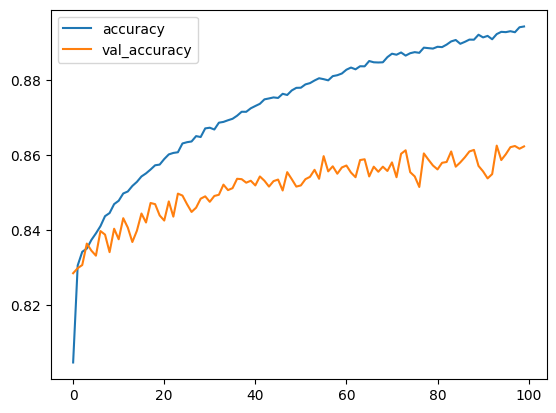

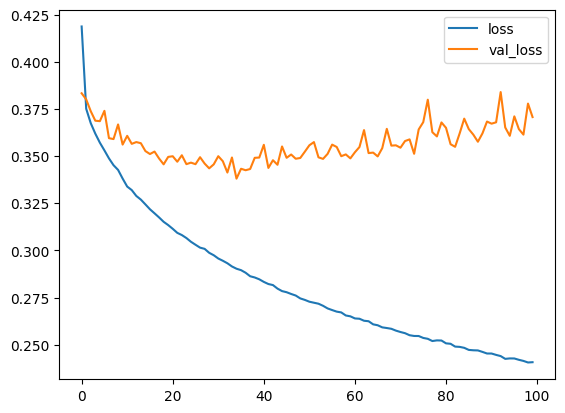

In [172]:
# Plot Training Results
history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

In [173]:
print('------------------Training Set------------------')
print(classification_report(y_train_enc, model_sequential.predict(X_train_final_df).round()))
print('------------------Validation Set------------------')
print(classification_report(y_val_enc, model_sequential.predict(X_val_final_df).round()))

------------------Training Set------------------


1198/1198 [==============================] - 4s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     25467
           1       0.87      0.80      0.83     12857

    accuracy                           0.89     38324
   macro avg       0.89      0.87      0.88     38324
weighted avg       0.89      0.89      0.89     38324

------------------Validation Set------------------
300/300 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6476
           1       0.80      0.77      0.78      3106

    accuracy                           0.86      9582
   macro avg       0.84      0.84      0.84      9582
weighted avg       0.86      0.86      0.86      9582



**Model Evaluation - Training Set & Validation Set**

This Sequential model produces a fairly good accuracy of 0.89 on the training set and 0.86 on the validation set.

Tt can be seen from the metric graphs that the model is **overfitting**, this is indicated when the training loss of the model has huge gap with the validation loss.

In [174]:
# Model prediction test-set
model_sequential.predict(X_test_final_df)

375/375 [==============================] - 1s 3ms/step


array([[4.3038574e-01],
       [2.7597755e-01],
       [4.7839098e-03],
       ...,
       [5.9000577e-06],
       [9.9109358e-01],
       [8.4578747e-01]], dtype=float32)

In [175]:
# Model Evaluation of test-set
y_pred_seq = model_sequential.predict(X_test_final_df)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_seq))

 32/375 [=>............................] - ETA: 1s

375/375 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7979
           1       0.79      0.75      0.77      3998

    accuracy                           0.85     11977
   macro avg       0.84      0.83      0.83     11977
weighted avg       0.85      0.85      0.85     11977



**Model Evaluation - Test Set**

This Sequential model produces relatively good accuracy of 0.85 on the test set

# Model Improvement

The data science team has decided to attempt on improving the model

In [281]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Model Definition

Model Improvement by tuning parameters: 
- adding 2 hidden layer with 8 neurons and 4 neurons
- changed the optimizer to `nadam`

In [282]:
model_seq_imp = Sequential()
model_seq_imp.add(Dense(64,
                        activation='relu',
                        kernel_initializer=tf.keras.initializers.HeNormal(seed),
                        input_shape=(33,))) # Hidden Layer 1
model_seq_imp.add(Dense(32,
                        activation='relu',
                        kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_seq_imp.add(Dense(16,
                        activation='relu',
                        kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 3
model_seq_imp.add(Dense(8,
                        activation='relu',
                        kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 4
model_seq_imp.add(Dense(4,
                        activation='relu',
                        kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 5

model_seq_imp.add(Dense(1,
                        activation='sigmoid',
                        kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer


# Compile
model_seq_imp.compile(loss='binary_crossentropy',
                        optimizer='nadam',
                        metrics=['accuracy'])

model_seq_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2176      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainabl

## Model Training

In [283]:
# Train the model
start_time = time.time()

history_seq_imp = model_seq_imp.fit(train_pipe, epochs=100, validation_data=(val_pipe))

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100


2396/2396 [==============================] - 12s 3ms/step - loss: 0.4142 - accuracy: 0.8084 - val_loss: 0.3906 - val_accuracy: 0.8243
Epoch 2/100
2396/2396 [==============================] - 6s 2ms/step - loss: 0.3763 - accuracy: 0.8299 - val_loss: 0.3784 - val_accuracy: 0.8306
Epoch 3/100
2396/2396 [==============================] - 6s 3ms/step - loss: 0.3692 - accuracy: 0.8330 - val_loss: 0.3764 - val_accuracy: 0.8312
Epoch 4/100
2396/2396 [==============================] - 6s 3ms/step - loss: 0.3637 - accuracy: 0.8353 - val_loss: 0.3719 - val_accuracy: 0.8323
Epoch 5/100
2396/2396 [==============================] - 6s 3ms/step - loss: 0.3586 - accuracy: 0.8372 - val_loss: 0.3632 - val_accuracy: 0.8376
Epoch 6/100
2396/2396 [==============================] - 6s 2ms/step - loss: 0.3547 - accuracy: 0.8382 - val_loss: 0.3615 - val_accuracy: 0.8384
Epoch 7/100
2396/2396 [==============================] - 6s 3ms/step - loss: 0.3491 - accuracy: 0.8425 - val_loss: 0.3610 - val_accuracy: 0.8

## Model Evaluation

In [284]:
# Create DataFrame
history_seq_df_imp = pd.DataFrame(history_seq_imp.history)
history_seq_df_imp

,loss,accuracy,val_loss,val_accuracy
0,0.414223,0.808397,0.390580,0.824254
1,0.376336,0.829950,0.378441,0.830620
2,0.369241,0.832951,0.376407,0.831246
3,0.363678,0.835325,0.371903,0.832290
4,0.358565,0.837191,0.363221,0.837612
...,...,...,...,...
95,0.236115,0.894622,0.360827,0.855876
96,0.236069,0.894818,0.365060,0.856815
97,0.238052,0.894035,0.369566,0.859737
98,0.235644,0.894792,0.358717,0.856293


<Axes: >

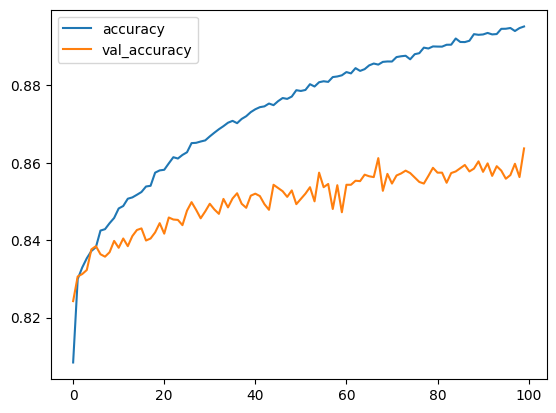

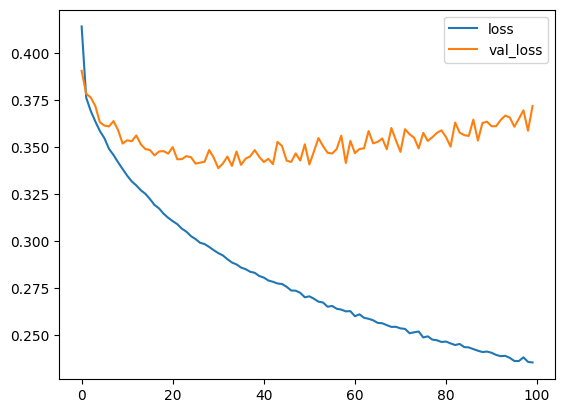

In [285]:
# Plot Training Results
history_seq_df_imp[['accuracy', 'val_accuracy']].plot()
history_seq_df_imp[['loss', 'val_loss']].plot()

In [286]:
print('------------------Training Set------------------')
print(classification_report(y_train_enc, model_seq_imp.predict(X_train_final_df).round()))
print('------------------Validation Set------------------')
print(classification_report(y_val_enc, model_seq_imp.predict(X_val_final_df).round()))

------------------Training Set------------------


1198/1198 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     25467
           1       0.83      0.87      0.85     12857

    accuracy                           0.90     38324
   macro avg       0.88      0.89      0.89     38324
weighted avg       0.90      0.90      0.90     38324

------------------Validation Set------------------
300/300 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      6476
           1       0.76      0.84      0.80      3106

    accuracy                           0.86      9582
   macro avg       0.84      0.86      0.85      9582
weighted avg       0.87      0.86      0.87      9582



**Model Evaluation - Training Set & Validation Set**

This Sequential model produces a fairly good accuracy of 0.90 on the training and validation set.

Tt can be seen from the metric graphs that the model is **overfitting**, this is indicated when the training loss of the model has huge gap with the validation loss.

In [287]:
# Model improvement prediction
model_seq_imp.predict(X_test_final_df)

 24/375 [>.............................] - ETA: 0s 

375/375 [==============================] - 1s 2ms/step


array([[1.6620821e-01],
       [2.4773259e-01],
       [1.3586755e-04],
       ...,
       [5.5782398e-04],
       [9.0432453e-01],
       [7.8484160e-01]], dtype=float32)

In [288]:
# Model improvement evaluation of test-set
y_pred_seq_imp = model_seq_imp.predict(X_test_final_df)
y_pred_seq_imp = np.where(y_pred_seq_imp >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_seq_imp))

 39/375 [==>...........................] - ETA: 0s 

375/375 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7979
           1       0.77      0.83      0.80      3998

    accuracy                           0.86     11977
   macro avg       0.84      0.85      0.84     11977
weighted avg       0.86      0.86      0.86     11977



**Model Evaluation - Test Set**

This Sequential model produces relatively good accuracy of 0.86 on the test set

# Model Saving

In [289]:
# Save the files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols_1.txt', 'w') as file_2:
  json.dump(cat_columns_1, file_2)
  
with open('list_cat_cols_2.txt', 'w') as file_3:
  json.dump(cat_columns_2, file_3)

with open('model_scaler.pkl', 'wb') as file_4:
  pickle.dump(scaler, file_4)

with open('model_encoder_1.pkl', 'wb') as file_5:
  pickle.dump(ohe_1, file_5)

with open('model_encoder_2.pkl', 'wb') as file_6:
  pickle.dump(label_enc, file_6)


In [290]:
model_seq_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2176      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainabl

In [291]:
# Freeze Model
model_seq_imp.trainable = False
model_seq_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2176      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 4,961
Trainable params: 0
Non-trainable pa

In [292]:
# Save Model
model_seq_imp.save('model_sequential_improvement.h5')

# Model Inferencing

The model inferencing is shown on "h8dsft_final_project_Abi_Sugiri_Inf.ipynb"

# Conclusions

**The conclusions that can be drawn from the results of EDA and modeling using Artificial Neural Network (ANN) are**:


- The objective of this project is to predict client's potential to subscribe term deposit. The dataset is record of customers data from a previous marketing campaign. Analyzing customer's occupation, the outcome of previous campaign and means of communication can be useful on developing the marketing strategy. Addition to the EDA-based analysis, another approach with implementing Artifical Neural Network (ANN) can be very effective in improving the marketing strategy.


Based on the hypothesis, the data science team made a prediction model using Artificial Neural Network with the following results:


- The first sequential API model has peformed quite satisfactory with accuracy score 0.85 but tend to overfit, shown by the graphs above. Therefore, the team attempted to improve the model so that the accuracy score is increased and the model tend to be goodfit or the gap between training and validation from loss and accuracy graphs are closer. The result from the second model is that the accuracy score has made small improvement with 0.86 and the second model is still tend to overfit. With the satisfactory result of the accuracy scores, the model can be utilzed for telephone marketing on predicting which customer has the potential to convert or subscribe to term deposit.